In [2]:
#Hej Ada, tu nie dziala wykres w komorce 36
#Nalepszy wynik uzyskala zmienna 'S5', dla ktorej MSE jest najnizsza

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets


In [4]:
import os
os.chdir('downloads')

In [5]:
os.getcwd()

'C:\\Users\\petri\\downloads'

In [6]:
# Dane:https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
# "Ten baseline variables, age, sex, body mass index, (average blood pressure, 
# and six blood serum measurements were obtained for e)ach of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline."
# diabetes = datasets.load_diabetes()
# data = diabetes.data # nalezy je przekształcić do pandasowego dataframe'u
data = pd.read_csv('diabetes.csv')
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [7]:
os.getcwd()

'C:\\Users\\petri\\downloads'

In [8]:
## Atrybuty + Zmienna modelowana
data.columns.tolist()

['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']

In [9]:
data.shape

(442, 11)

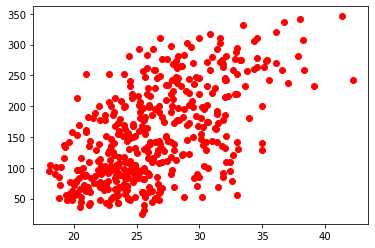

In [10]:
plt.scatter(data.BMI, data.Y,  color='red')

In [11]:
np.corrcoef(data.BMI, data.Y) #numpy

array([[1.        , 0.58645013],
       [0.58645013, 1.        ]])

In [12]:
data.BMI.corr(data.Y) # pandas

0.5864501344746887

In [13]:
corr = data.corr()
corr

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


<AxesSubplot:>

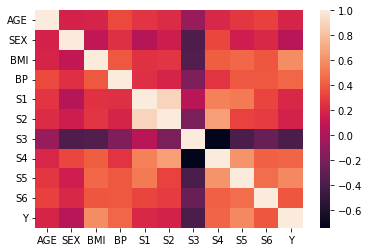

In [14]:
import seaborn as sns
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

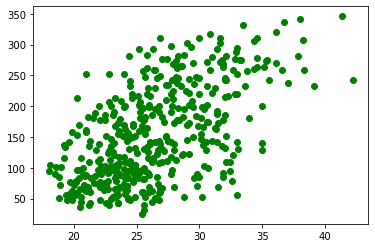

In [15]:
plt.scatter(data.BMI, data.Y,  color='green')

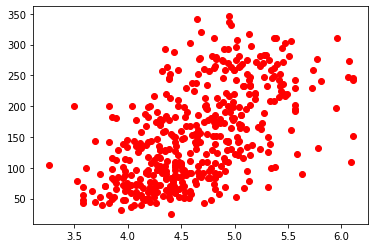

In [16]:
plt.scatter(data.S5, data.Y,  color='red') #moze nie trzeba

In [17]:
data.isnull().values.any()

False

In [18]:
dataset = data.iloc[:,:-1] # wyodrebniamy zmienne objaśniające bez targetu

In [19]:
# Wyodrębniamy dane treningowe i testowe
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['BMI']], data.Y, test_size=0.2, random_state=0)

In [20]:
# 1. Tworzymy obiekt modelu
model = LinearRegression()
# 2. Trenujemy model na danych treningowych
model.fit(X_train, y_train)
# 3. Sprawdzamy poprawność działania modelu - model dokonuje predykcji na danych testowych i porównuje jej wyniki
# z prawdziwymi etykietami tych danych - zwraca R^2 
model.score(X_test, y_test)

0.19057346847560142

In [21]:
model.coef_ # Podejrzyjmy współczynniki modelu

array([10.58040081])

In [22]:
model.intercept_ # Punkt przecięcia prostej z osią Y

-126.77820035769687

In [23]:
predykcje = model.predict(X_test)

In [24]:
predykcje

array([255.17426905, 211.79462571, 161.0087018 , 129.26749936,
       196.98206457, 247.76798848, 123.97729895, 174.76322286,
       205.44638522, 198.04010465,  95.41021675, 198.04010465,
       115.5129783 , 107.04865765, 239.30366783, 130.32553944,
        94.35217667, 101.75845724,  70.01725479, 191.69186416,
       180.05342327, 163.12478196, 128.20945928, 209.67854555,
       206.5044253 , 169.47302245, 111.28081797, 108.10669773,
       156.77654147, 177.9373431 , 149.3702609 , 100.70041716,
       141.96398033, 140.90594025, 146.19614066, 172.6471427 ,
       136.67377993, 143.02202042, 153.60242123, 185.34362367,
        88.00393618, 141.96398033, 145.13810058, 148.31222082,
       182.16950343,  92.23609651, 133.49965968, 176.87930302,
       119.74513862, 185.34362367, 130.32553944, 105.99061756,
       170.53106253, 144.0800605 , 194.86598441, 134.55769976,
       182.16950343, 148.31222082, 147.25418074, 164.18282204,
       192.74990424, 175.82126294, 201.2142249 , 131.38

In [25]:
# Mean squared error
print("Mean squared error: %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))

Mean squared error: 4150.68


In [27]:
predykcje.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, predykcje, color='blue')
plt.show()

In [ ]:
# Wyodrębniamy dane treningowe i testowe
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['BMI', 'S5', 'S4']], data.Y, test_size=0.2, random_state=0)

In [ ]:
# 1. Tworzymy obiekt modelu
model1 = LinearRegression()
# 2. Trenujemy model na danych treningowych
model1.fit(X_train, y_train)
# 3. Sprawdzamy poprawność działania modelu - model dokonuje predykcji na danych testowych i porównuje jej wyniki
# z prawdziwymi etykietami tych danych - zwraca R^2 
model1.score(X_test, y_test)

In [ ]:
predykcje = model1.predict(X_test)
plt.scatter(y_test, predykcje)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, data.Y, test_size=0.2, random_state=0)

In [ ]:
# 1. Tworzymy obiekt modelu
model2 = LinearRegression()
# 2. Trenujemy model na danych treningowych
model2.fit(X_train, y_train)
# 3. Sprawdzamy poprawność działania modelu - model dokonuje predykcji na danych testowych i porównuje jej wyniki
# z prawdziwymi etykietami tych danych - zwraca R^2 
model2.score(X_test, y_test)

In [ ]:
# Wizualizacja współczynników zmiennych w przypadku więcej niż jednej zmiennej objaśniającej
coeff = list(model2.coef_)
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['AGE']], data.Y, test_size=0.2, random_state=0)

In [ ]:
model3 = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
print("Mean squared error: %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['SEX']], data.Y, test_size=0.2, random_state=0)

In [ ]:
model4 = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
print("Mean squared error: %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['BP']], data.Y, test_size=0.2, random_state=0)

In [ ]:
model5 = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
print("Mean squared error: %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['S1']], data.Y, test_size=0.2, random_state=0)

In [ ]:
model6 = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
print("Mean squared error: %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['S2']], data.Y, test_size=0.2, random_state=0)

In [ ]:
model7 = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
print("Mean squared error: %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['S3']], data.Y, test_size=0.2, random_state=0)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
print("Mean squared error: %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['S4']], data.Y, test_size=0.2, random_state=0)

In [ ]:
model8 = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
print("Mean squared error: %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['S5']], data.Y, test_size=0.2, random_state=0)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
print("Mean squared error: %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['S6']], data.Y, test_size=0.2, random_state=0)

In [ ]:
model9 = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
print("Mean squared error: %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['BMI', 'S5', 'S4', 'AGE', 'SEX', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']], data.Y, test_size=0.2, random_state=0)

In [ ]:
model10 = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
print("Mean squared error: %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))